> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 12: Naive Bayes, SVM, and Neural Networks

## Outline

- Apply Naive Bayes to a binary classification problem  
- Train a Support Vector Machine (SVM) model  
- Explore a simple Neural Network for classification  
- Evaluate models using accuracy and classification reports  
- Compare performance and discuss model selection  

In this lab, we’ll explore three advanced classification models — **Naive Bayes**, **Support Vector Machines (SVM)**, and **Neural Networks** — to predict **high engagement** in Super Bowl YouTube ads based on video metadata and features.

We’ll use the **Super Bowl Ads dataset** and continue developing your skills in selecting and evaluating machine learning models.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_12_bayes_svm_neural.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Data Description

The dataset for this lab consists of **YouTube metadata and thematic features** of Super Bowl commercials, originally sourced from [TidyTuesday (March 2, 2021)](https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-03-02/youtube.csv).

Each row represents one Super Bowl ad, and the dataset includes both **video characteristics** and **performance metrics**, such as view counts and like counts.

Below are key variables we'll work with:

| Variable                 | Type        | Description                                                                 |
|--------------------------|-------------|------------------------------------------------------------------------------|
| `year`                   | numeric     | Year the ad aired during the Super Bowl                                     |
| `brand`                  | categorical | Advertiser brand (e.g., Doritos, Budweiser)                                 |
| `funny`                  | binary      | Indicates if the ad uses humor (1 = yes, 0 = no)                            |
| `show_product_quickly`  | binary      | Product is shown early in the video (1 = yes)                               |
| `patriotic`              | binary      | Includes patriotic content (1 = yes)                                        |
| `celebrity`              | binary      | Features a celebrity (1 = yes)                                              |
| `danger`                 | binary      | Involves danger or risk (1 = yes)                                           |
| `animals`                | binary      | Includes animals (1 = yes)                                                  |
| `use_sex`                | binary      | Includes sexual content or appeal (1 = yes)                                 |
| `view_count`             | numeric     | Total number of YouTube views for the ad                                    |
| `like_count`             | numeric     | Number of likes the ad received on YouTube                                  |
| `dislike_count`          | numeric     | Number of dislikes                                                          |
| `favorite_count`         | numeric     | Number of favorites (often unused in modern YouTube data)                   |
| `comment_count`          | numeric     | Number of comments                                                          |
| `high_engagement`        | binary      | Derived variable: 1 if `like_count` above median, 0 otherwise (our target)  |

### Why this dataset?

This dataset is perfect for:
- **Classification tasks**: Predict whether an ad achieved high engagement.
- **Marketing insights**: Identify which ad traits (e.g., humor, celebrities) drive viewer responses.
- **Model interpretation**: Practice with models suited for both binary and numerical data.

Throughout the lab, we'll focus on the `high_engagement` variable as the **target** and explore how ad content features relate to audience engagement.


## Part 1: Load and Clean the Data

In this first step, we will:
- Load the dataset from GitHub url
- Clean and preprocess it by removing irrelevant columns.
- Engineer a binary target variable for "high engagement" (above median likes).

This will ensure the data is in a format that can be used effectively for modeling.


In [1]:
import pandas as pd
import numpy as np

# Load dataset
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/youtube.csv'
youtube = pd.read_csv(url)

# Drop irrelevant or complex API columns
youtube = youtube.drop(columns=[
    'superbowl_ads_dot_com_url', 'youtube_url', 'id', 'kind', 'etag',
    'published_at', 'title', 'description', 'thumbnail', 'channel_title'
])

# Convert logical (boolean) columns to integers for modeling
logical_columns = ['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']
youtube[logical_columns] = youtube[logical_columns].astype(int)

# Drop rows with missing like_count
youtube = youtube.dropna(subset=['like_count', 'view_count'])

# Create target: high_engagement
median_likes = youtube['like_count'].median()
youtube['high_engagement'] = (youtube['like_count'] > median_likes).astype(int)


# Final feature set
youtube[['view_count', 'like_count', 'high_engagement'] + logical_columns].head()

,view_count,like_count,high_engagement,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
0,173929.0,1233.0,1,0,0,0,0,0,0,0
1,47752.0,485.0,1,1,1,0,1,1,0,0
2,142310.0,129.0,0,1,0,0,0,1,1,0
3,198.0,2.0,0,0,1,0,0,0,0,0
4,13741.0,20.0,0,1,1,0,0,1,1,1


## Part 2: Naive Bayes Classifier

Naive Bayes is a **probabilistic model** based on Bayes' Theorem. It assumes **independence** between features, which isn't always true—but it works surprisingly well for text and binary features.

We'll use the boolean ad features (like `funny`, `celebrity`, etc.) to predict whether the video had high engagement.

Ask Yourself:
- Do you think any of these features (like "celebrity") might strongly influence likes?
- How might the independence assumption affect the predictions?

Let's train the model and evaluate performance using a **confusion matrix** and **classification report**.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and labels
X = youtube[logical_columns]
y = youtube['high_engagement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[19 19]
 [16 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52        38
           1       0.42      0.47      0.44        30

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.49      0.49        68

Accuracy: 0.4852941176470588


### 🔧 Try It Yourself — Part 2

1. **Change the test size** to `0.2`. How does this affect accuracy?  
   > Update `train_test_split(test_size=0.2)` and rerun the model.

2. **Remove `celebrity` and `funny` features** from X. Rerun the model and check performance.  
   > Modify:  
   `X = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]`

### In Your Response:

1. Which model setup performed best? Why might that be?


Confusion Matrix:
 [[15 12]
 [ 8 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.56      0.60        27
           1       0.45      0.56      0.50        18

    accuracy                           0.56        45
   macro avg       0.55      0.56      0.55        45
weighted avg       0.57      0.56      0.56        45

Accuracy: 0.5555555555555556


Confusion Matrix:
 [[13 14]
 [ 9  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.48      0.53        27
           1       0.39      0.50      0.44        18

    accuracy                           0.49        45
   macro avg       0.49      0.49      0.48        45
weighted avg       0.51      0.49      0.49        45

Accuracy: 0.4888888888888889


The model where the test size was changed to 0.2 performed the best. It had an accuracy score of 0.556 compared to 0.49, the approximate score of the other two models. I think that having an extra ten percent of the dataset to train on went a long way in improving accuracy of the model. The original model had a test size of 0.3, meaning that the model trained on 70% of the dataset. Changing the test size to 0.2 meant that the model was trained on 80% of the dataset, which improved accuracy by roughly six points. The model was trained on more data, so it was more accurate. This is logical.

## Part 3: Support Vector Machine (SVM)

### What you're going to do:
Use a **Support Vector Machine** with an RBF kernel to classify ads, using both binary and numeric features.

### Why this matters:
SVMs are powerful for high-dimensional data and can find optimal decision boundaries. They are also common in fraud detection and image recognition.

### Regularization Parameter (C):

- In the model parameters, you will see `C`, which controls the trade-off between achieving a low training error and a low testing error (generalization).

- A large `C` value (e.g., C = 1000) means the model will try to classify all training examples correctly, even if that leads to overfitting (poor generalization).

- A small `C` value (e.g., C = 0.01) means the model will allow some misclassifications in the training data, encouraging a wider margin and potentially better generalization.

### What to notice:
- How does scaling the data affect performance?
- What happens when you change the kernel or regularization?

In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))


Confusion Matrix:
 [[19 19]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        38
           1       0.46      0.53      0.49        30

    accuracy                           0.51        68
   macro avg       0.52      0.52      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411


### 🔧 Try It Yourself — Part 3

1. **Change the kernel** to `'linear'` or `'poly'`.  
2. **Try 2 different `C` values** like `0.1`, `1`, and `10`. Observe what changes.

### In Your Response:
1. What’s the tradeoff between higher and lower values of `C`?
2. Which value of C gave you the best Accuracy?  


SVM with Linear Kernel
Confusion Matrix:
 [[20 18]
 [17 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.53      0.53        38
           1       0.42      0.43      0.43        30

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.49      0.49        68

Accuracy: 0.4852941176470588


SVM with RBF Kernel and C=1
Confusion Matrix:
 [[19 19]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        38
           1       0.46      0.53      0.49        30

    accuracy                           0.51        68
   macro avg       0.52      0.52      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411


SVM with RBF Kernel and C=10
Confusion Matrix:
 [[18 20]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.47      0.51        38
           1       0.44      0.53      0.48        30

    accuracy                           0.50        68
   macro avg       0.50      0.50      0.50        68
weighted avg       0.51      0.50      0.50        68

Accuracy: 0.5


in SVM, higher values of C give you a smaller margin and a more strict classifier. This can lead to overfitting. Lower values of C result in a wider margin and a softer classifier that is more tolerant of misclassifications. This can prevent overfitting, but may lead to underfitting if C is set too low.

A C value of 1 gave me the best accuracy, at 51 percent.

## Part 4: Neural Networks

### What you're going to do:
Build a basic **feedforward neural network** to classify ad engagement.

### Why this matters:
Neural networks are the foundation of modern AI. Even a simple one can outperform traditional models when tuned correctly.

### What to notice:
- This may take several minutes to run!  Be patient.
- How does training accuracy compare to validation accuracy?
- Do more layers or epochs help — or hurt?


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4702 - loss: 0.6951 - val_accuracy: 0.5147 - val_loss: 0.6851
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5068 - loss: 0.6912 - val_accuracy: 0.5000 - val_loss: 0.6853
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4940 - loss: 0.6915 - val_accuracy: 0.5294 - val_loss: 0.6863
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5323 - loss: 0.6869 - val_accuracy: 0.5735 - val_loss: 0.6860
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5557 - loss: 0.6785 - val_accuracy: 0.5588 - val_loss: 0.6852
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5402 - loss: 0.6881 - val_accuracy: 0.5735 - val_loss: 0.6854
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5597 - loss: 0.6781 - val_accuracy: 0.5735 - val_loss: 0.6843
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5281 - loss: 0.6824 - val_accuracy: 0.5735 - v

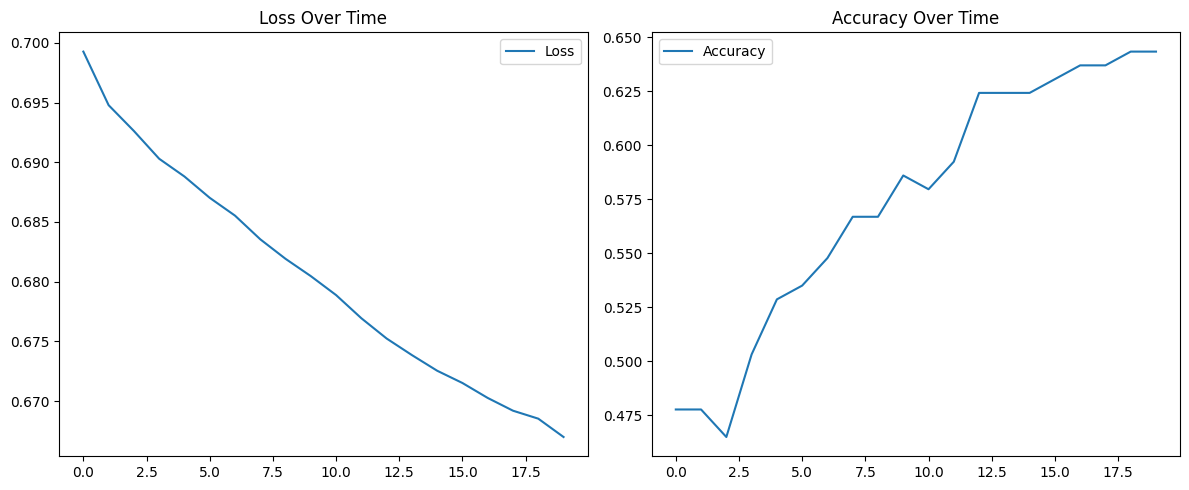

In [10]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.tight_layout()
plt.show()

### 🔧 Try It Yourself — Part 4

1. Add or remove layers from the model.
2. Increase or decrease batch size to numbers such as 8 or 32. Try out 5 different combinations of different batch sizes and layers. Notice if these changes affect ms/step for each Epoch. Also notice how the accuracy changes as you alter layers and batch size.
3. Add Dropout to your model

### In Your Response:
1. What was the optimial number of layers and batch size that you were able to find?  (Remember, you should try about 5 different combinations)
2. Does adding `Dropout` help reduce overfitting? Use the "loss over time" plot to support your answer.


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.4895 - loss: 0.8541 - val_accuracy: 0.4559 - val_loss: 0.8708
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5090 - loss: 0.7830 - val_accuracy: 0.4559 - val_loss: 0.8399
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5588 - loss: 0.7187 - val_accuracy: 0.4706 - val_loss: 0.8127
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4973 - loss: 0.7630 - val_accuracy: 0.4706 - val_loss: 0.7903
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5394 - loss: 0.7020 - val_accuracy: 0.4559 - val_loss: 0.7760
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5420 - loss: 0.6633 - val_accuracy: 0.4559 - val_loss: 0.7630
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5700 - loss: 0.6907 - val_accuracy: 0.4853 - val_loss: 0.7527
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5521 - loss: 0.7126 - val_accuracy: 0.4853 - val_loss: 0.

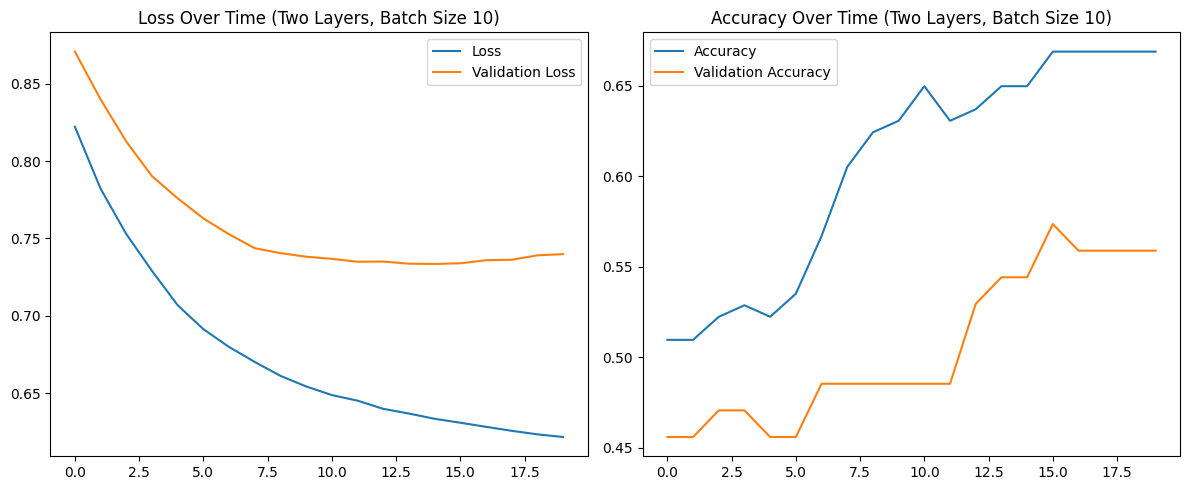

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.4814 - loss: 0.6835 - val_accuracy: 0.5000 - val_loss: 0.7222
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5937 - loss: 0.6684 - val_accuracy: 0.4853 - val_loss: 0.7273
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5428 - loss: 0.6692 - val_accuracy: 0.4853 - val_loss: 0.7310
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5553 - loss: 0.6622 - val_accuracy: 0.5147 - val_loss: 0.7364
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6005 - loss: 0.6428 - val_accuracy: 0.5294 - val_loss: 0.7419
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6091 - loss: 0.6460 - val_accuracy: 0.5588 - val_loss: 0.7440
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6189 - loss: 0.6524 - val_accuracy: 0.5294 - val_loss: 0.7460
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6220 - loss: 0.6474 - val_accuracy: 0.5294 - val_loss: 0.7501


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Neural Network with Six Layers and Batch Size 35
Confusion Matrix:
 [[20 18]
 [12 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.53      0.57        38
           1       0.50      0.60      0.55        30

    accuracy                           0.56        68
   macro avg       0.56      0.56      0.56        68
weighted avg       0.57      0.56      0.56        68

Accuracy: 0.5588235294117647


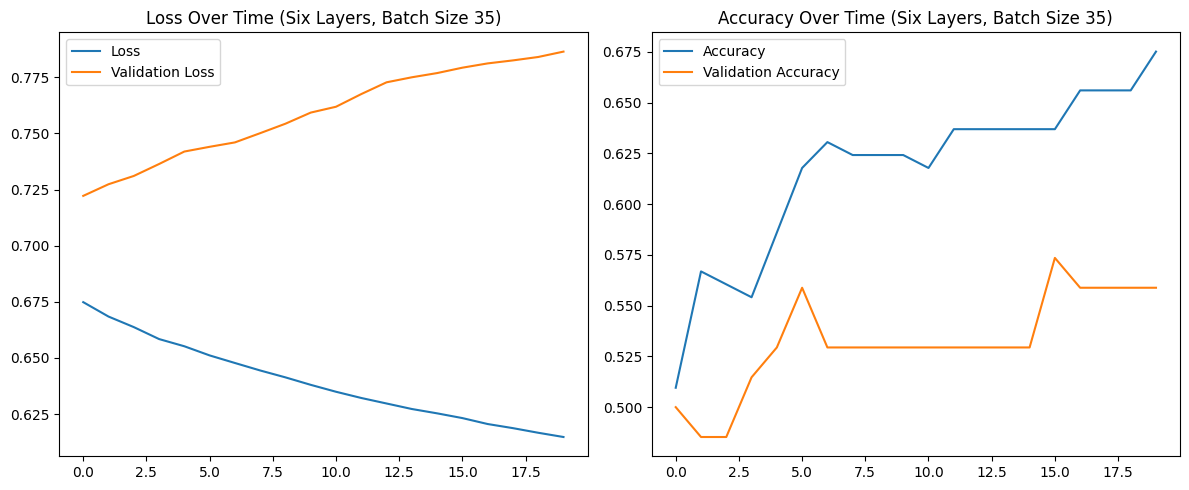

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.4169 - loss: 0.7303 - val_accuracy: 0.5882 - val_loss: 0.6652
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4197 - loss: 0.7347 - val_accuracy: 0.5441 - val_loss: 0.6679
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3884 - loss: 0.7220 - val_accuracy: 0.5588 - val_loss: 0.6711
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4568 - loss: 0.7066 - val_accuracy: 0.5588 - val_loss: 0.6745
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4176 - loss: 0.7024 - val_accuracy: 0.4853 - val_loss: 0.6778
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4714 - loss: 0.6958 - val_accuracy: 0.5294 - val_loss: 0.6810
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5705 - loss: 0.6872 - val_accuracy: 0.5294 - val_loss: 0.6844
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5248 - loss: 0.6828 - val_accuracy: 0.5588 - val_loss: 0.6868
Epoch 9/20


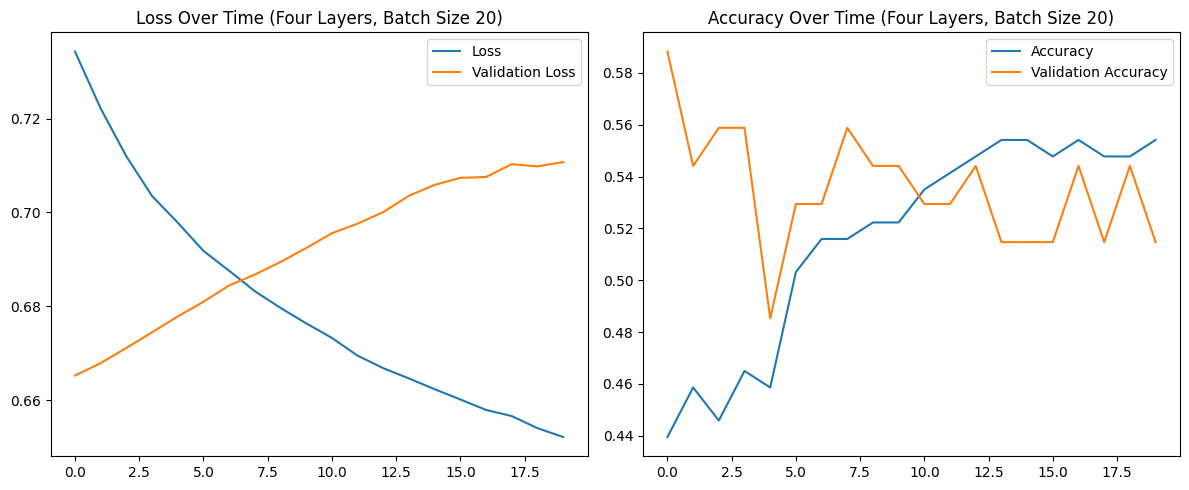

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.5223 - loss: 0.7212 - val_accuracy: 0.4412 - val_loss: 0.7609
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5756 - loss: 0.6841 - val_accuracy: 0.4412 - val_loss: 0.7566
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5556 - loss: 0.6883 - val_accuracy: 0.4412 - val_loss: 0.7524
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5164 - loss: 0.6997 - val_accuracy: 0.4412 - val_loss: 0.7485
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5248 - loss: 0.7000 - val_accuracy: 0.4412 - val_loss: 0.7451
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5389 - loss: 0.6802 - val_accuracy: 0.4412 - val_loss: 0.7423
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4864 - loss: 0.7055 - val_accuracy: 0.4412 - val_loss: 0.7398
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5106 - loss: 0.6830 - val_accuracy: 0.4412 - val_loss: 0.7379
Epoch 9/20


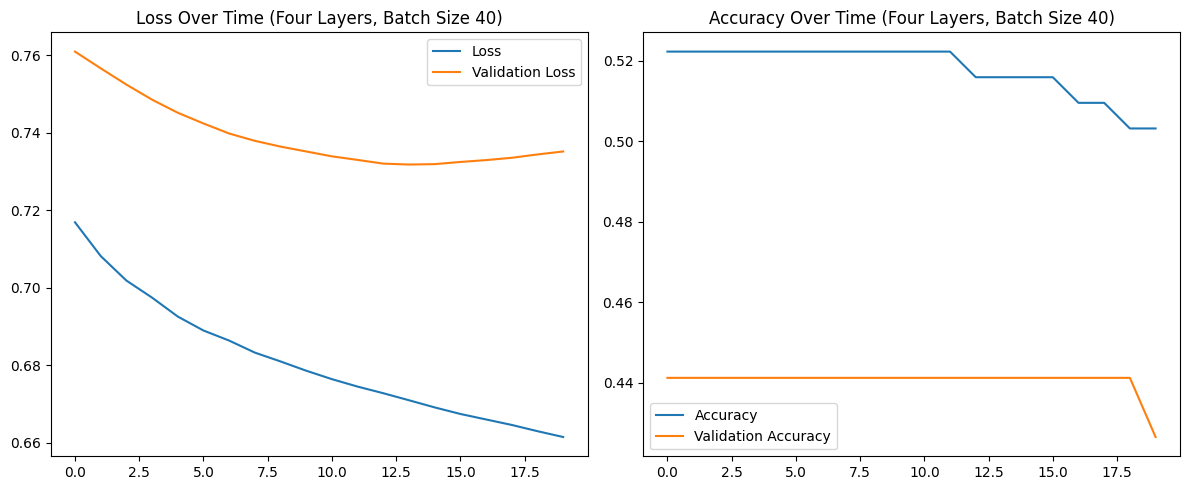

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5003 - loss: 0.6975 - val_accuracy: 0.4412 - val_loss: 0.7014
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4718 - loss: 0.6971 - val_accuracy: 0.4559 - val_loss: 0.7012
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5689 - loss: 0.6881 - val_accuracy: 0.4853 - val_loss: 0.7020
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5433 - loss: 0.6835 - val_accuracy: 0.4853 - val_loss: 0.7053
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5878 - loss: 0.6725 - val_accuracy: 0.4853 - val_loss: 0.7069
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5941 - loss: 0.6753 - val_accuracy: 0.4706 - val_loss: 0.7083
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5561 - loss: 0.6720 - val_accuracy: 0.4559 - val_loss: 0.7108
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5007 - loss: 0.6649 - val_accuracy: 0.4559 - val_loss: 0.7130
Ep

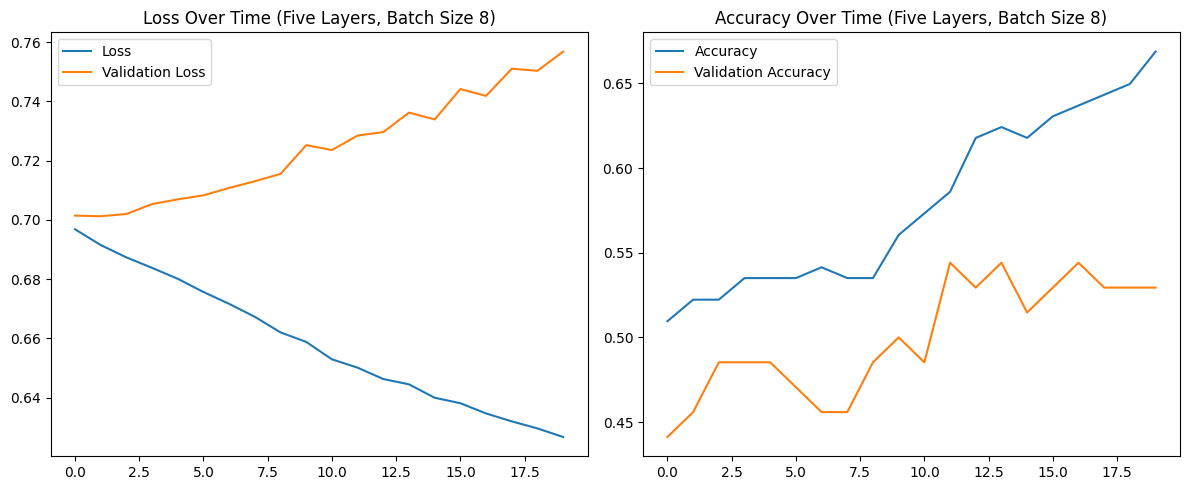

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5902 - loss: 0.7144 - val_accuracy: 0.5441 - val_loss: 0.6809
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4532 - loss: 0.7466 - val_accuracy: 0.5294 - val_loss: 0.6813
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4426 - loss: 0.7716 - val_accuracy: 0.5735 - val_loss: 0.6830
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5670 - loss: 0.7395 - val_accuracy: 0.5735 - val_loss: 0.6847
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5474 - loss: 0.7548 - val_accuracy: 0.5882 - val_loss: 0.6861
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5326 - loss: 0.6850 - val_accuracy: 0.5882 - val_loss: 0.6873
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5114 - loss: 0.6959 - val_accuracy: 0.5588 - val_loss: 0.6895
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5273 - loss: 0.7066 - val_accuracy: 0.5588 - val_loss: 0.

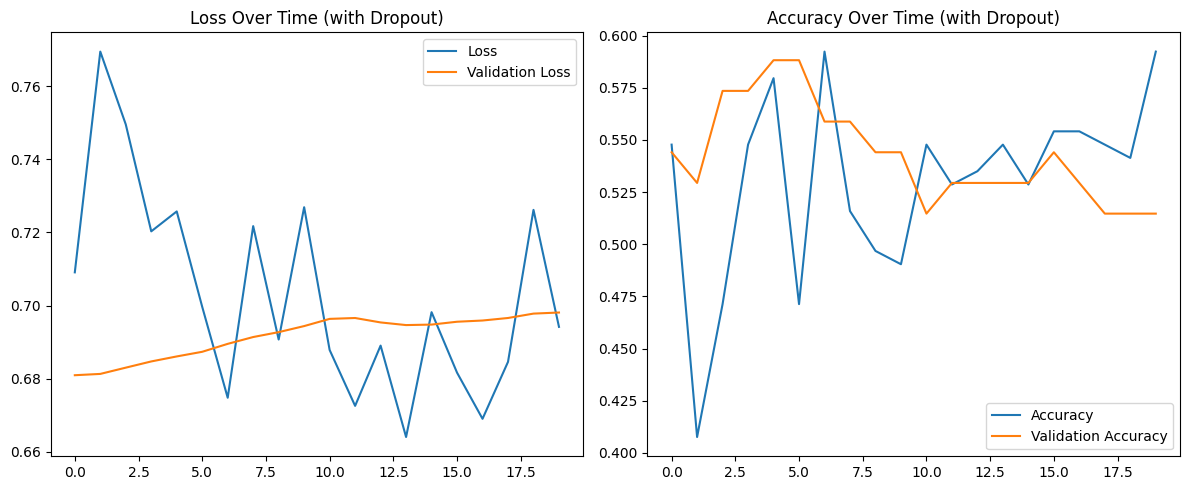

In [16]:

# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split (using the same split as the previous models)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Model with Dropout layers
model_dropout = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  # Layer 1
    Dropout(0.2), # Added Dropout
    Dense(8, activation='relu'),  # Layer 2
    Dropout(0.2), # Added Dropout
    Dense(4, activation='relu'),  # Layer 3
    Dropout(0.2), # Added Dropout
    Dense(1, activation='sigmoid') # Output Layer
])

# Compile
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train with original batch size (16)
history_dropout = model_dropout.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                                         epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn_dropout = (model_dropout.predict(X_test_svm) > 0.5).astype(int)
print("Neural Network with Dropout")
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn_dropout))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn_dropout))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn_dropout))

# Plot learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['loss'], label='Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Time (with Dropout)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['accuracy'], label='Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Time (with Dropout)')
plt.legend()
plt.tight_layout()
plt.show()

The optimal combination seemed to be 6 layers, with a batch size of 35. This gave us an accuracy of just over 55%.

Adding dropout certainly does not reduce overfitting. In the loss over time plot, jagged peaks and sharp rises and falls are visible. This is what overfitting looks like. I want to see lines with natural, slight rises and falls, not super jagged tall peaks. Based on this plot, I would venture to guess that adding dropout increases overfitting within the model. I would be cautious using this in the future.

## 🔧 Part 5: Reflection (100 words or less per question)

1. Which model performed best on your dataset? Is this the result you expected?
2. Did any of the models appear to be overfit or underfit? How could you tell?
3. Which model would you recommend to a marketing team and why?

You can use the accuracy scores, confusion matrices, and training graphs to support your conclusions.


The model that performed the best on the dataset was the neural network model with six layers, and a batch size of 35. The accuracy score for this model was 55.8%, which was the highest of any model I made in this lab.


I worry about overfit within the neural network model with the dropout feature added. The loss over time graph with dropout exhibited very steep inclines and declines, creating jagged peaks. These sharp peaks lead me to worry about overfit. I expect to see more subtle increases and decreases in healthy models. I will be very careful in the future with using the dropout feature in any of my models.

I would recommend the neural network model with six layers and a batch size of 35 to a marketing team. This model yielded an accuracy score of 55.8%, which is good compared to the other models I made. This model would improve analytic capability for a marketing team because it would offer great predictive capabilities. It is more intensive than some other models, but I think its output is of higher quality. A neural network model is great when a marketing team wishes to find complex, non-linear patterns in data. I would recommend this model to a marketing team.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [17]:
!jupyter nbconvert --to html "lab_12_bayes_svm_neural.ipynb"

[NbConvertApp] Converting notebook lab_12_bayes_svm_neural.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 985340 bytes to lab_12_bayes_svm_neural.html
